In [1]:
# Este notebook é parte do curso de POO para Engenharia de Dados
# Módulo 1: Paradigma procedural vs. orientado a objetos


### Paradigma procedural vs. orientado a objetos

Imagine o seguinte problema:

Precisamos "criar" um medidor virtual de vazão, a partir de m diferencial de pressão medido.

Consideremos as segune premissas:
1 - modelo de vazão volumétrica simplificado:

Q = Cd · Y · √(2·ΔP/ρ)

onde:

- Cd = coef. de descarga
- 𝑌 = fator de expansão (Y = se Δ𝑃 pequeno)
- A = área efetiva
- ρ = densidade do fluido a montante


In [7]:
import numpy as np

sinal_delta_P = np.random.uniform(1000, 5000, 100)  # Pa

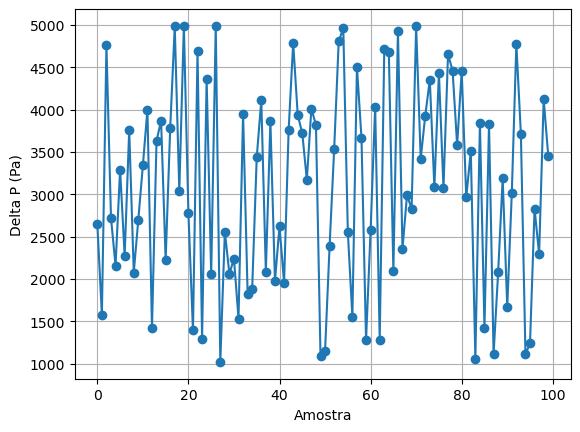

In [8]:
import matplotlib.pyplot as plt

plt.plot(sinal_delta_P, 'o-')
plt.xlabel('Amostra')
plt.ylabel('Delta P (Pa)')
plt.grid()
plt.show()

### Procedural

Vamos criar a função que define o cálculo da vazão voumétrica, da forma procedural

- Cd = 0.61  # Coeficiente de descarga (adimensional)
- Y = 1.0   # Fator de expansibilidade (adimensional)
- rho = 0.78  # Densidade do fluido (kg/m3) - típica de metano a 25°C e 1 atm

In [ ]:
def calcula_vazao_massica(Cd : float, Y: float, deltaP: float, rho: float) -> float:
    ''' Calcula a vazão mássica através de um orifício
        Cd: Coeficiente de descarga (adimensional)
        Y: Fator de expansibilidade (adimensional)
        deltaP: Queda de pressão (Pa)
        rho: Densidade do fluido (kg/m3)
    '''
    Q = Cd * Y * (2 * deltaP / rho) ** 0.5

    return Q

### Paradigma procedural vs. orientado a objetos

- O paradigma procedural organiza o código em funções e procedimentos, com dados e lógica separados.
- O paradigma orientado a objetos organiza o código em "objetos", que agrupam dados e comportamentos relacionados.

#### Vantagens práticas do paradigma orientado a objetos:
- Facilita a manutenção e evolução do código.
- Permite reutilização e extensão de funcionalidades.
- Torna o código mais próximo do mundo real, facilitando o entendimento.

#### Implicações nas nossas atividades:
- Projetos maiores e mais complexos se beneficiam da organização OO.
- Pequenos scripts podem ser mais simples no procedural, mas OO traz vantagens à medida que o projeto cresce.

slideshow: {"slide_type": "slide"}

#### Exemplo ilustrativo: Equação de estado dos gases ideais

<img src="Equacoes_de_estado.png" alt="Equações de estado - Exemplo ilustrativo" style="max-width: 100%; height: auto;">

slideshow: {"slide_type": "slide"}

In [2]:
# Paradigma Procedural: exemplo prático

# Cálculo do volume molar usando a equação de estado dos gases ideais
R = 0.0821  # constante dos gases (L.atm)/(mol.K)
T = 300     # temperatura (K)
P = 10      # pressão (atm)

# Procedimento procedural

def calc_volume_molar_ideal(T, P):
    return R * T / P

Vm = calc_volume_molar_ideal(T, P)

print(f"Volume molar (procedural): {Vm:.2f} L/mol")

#slideshow: {"slide_type": "slide"}

Volume molar (procedural): 2.46 L/mol


## Paradigma Orientado a Objetos: exemplo prático

Veja como o mesmo cálculo pode ser organizado usando o paradigma orientado a objetos.

slideshow: {"slide_type": "slide"}

## Discussão prática

Compare os dois exemplos acima:
- O procedural é direto, mas difícil de expandir para outros tipos de gases ou equações.
- O orientado a objetos permite criar novos métodos e reutilizar o código facilmente.

### Perguntas para reflexão
- Em que situações o procedural é suficiente?
- Quando vale a pena usar OO?
- Como a organização do código impacta a manutenção e evolução dos projetos?

slideshow: {"slide_type": "slide"}

In [ ]:
# Paradigma Orientado a Objetos: exemplo prático

class GasIdeal:
    def __init__(self, R=0.0821):
        self.R = R
    def calc_volume_molar(self, T, P):
        return self.R * T / P

gas = GasIdeal()

Vm_oo = gas.calc_volume_molar(T, P)

print(f"Volume molar (orientado a objetos): {Vm_oo:.2f} L/mol")

#slideshow: {"slide_type": "slide"}

## Exemplo prático: Sensor virtual de vazão de gás

Imagine que precisamos criar um sensor virtual para estimar a vazão de um gás em diferentes condições de operação. Com orientação a objetos, podemos criar uma classe que representa o sensor e encapsula toda a lógica necessária, facilitando a manutenção e expansão do código.

slideshow: {"slide_type": "slide"}

In [ ]:
# Classe para sensor virtual de vazão de gás

class SensorVirtualVazao:
    def __init__(self, R=0.0821):
        self.R = R
    def calc_volume_molar(self, T, P):
        return self.R * T / P
    def estimar_vazao(self, T, P, n, dt):
        Vm = self.calc_volume_molar(T, P)
        return n * Vm / dt  # vazão em L/s



# Exemplo de uso:

sensor = SensorVirtualVazao()

T = 320  # K

P = 8    # atm

n = 0.5  # mols de gás

dt = 10  # intervalo de tempo em segundos



vazao = sensor.estimar_vazao(T, P, n, dt)

print(f"Vazão estimada: {vazao:.2f} L/s")